# Task B: PathMNIST

## 1. Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import torch
import cv2
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from torch.optim import lr_scheduler
import copy
from sklearn.decomposition import PCA
import joblib

## 2. Feature engineering

In [8]:
path = os.path.abspath(os.path.join('..', 'Datasets/pathmnist.npz'))
print(path)

def data_process(path):
    # Get the dataset
    data = np.load(path)
    # Find the keys oof the dataset
    print(data.keys())
    # Extracting features and labels
    # Nomalization: dividing all features by 255

    train_X = data['train_images']/255.0
    train_y = data['train_labels'].squeeze()
    val_X = data['val_images']/255.0
    val_y = data['val_labels'].squeeze()
    test_X = data['test_images']/255.0
    test_y = data['test_labels'].squeeze()

    return train_X, train_y, val_X, val_y, test_X, test_y

# Determine whether to save the image plotted (These images are used to write report)
# It should be false when you run the program
save_image = True

# set the random seed to 42
torch.manual_seed(42)
train_X, train_y, val_X, val_y, test_X, test_y = data_process(path)

# create train_loader for training
train_tensor_X = torch.tensor(train_X, dtype=torch.float32).permute(0,3,1,2)

train_tensor_y = torch.tensor(train_y)
print(train_tensor_X.shape)
train_loader = DataLoader(TensorDataset(train_tensor_X, train_tensor_y), batch_size = 128, shuffle = True)

# create validation_loader for validation
val_tensor_X = torch.tensor(val_X, dtype=torch.float32).permute(0,3,1,2)
val_tensor_y = torch.tensor(val_y)
val_loader = DataLoader(TensorDataset(val_tensor_X, val_tensor_y), shuffle = False)

# create test_loader for testing
test_tensor_X = torch.tensor(test_X, dtype=torch.float32).permute(0,3,1,2)
test_tensor_y = torch.tensor(test_y)
test_loader = DataLoader(TensorDataset(test_tensor_X, test_tensor_y), shuffle = False)

print(train_X.shape)
print(test_tensor_X.shape)

c:\Users\xrw\Desktop\UCL\APPLIED MACHINE LEARNING\AMLS_assignment23_24-\Datasets\pathmnist.npz
KeysView(NpzFile 'c:\\Users\\xrw\\Desktop\\UCL\\APPLIED MACHINE LEARNING\\AMLS_assignment23_24-\\Datasets\\pathmnist.npz' with keys: train_images, val_images, test_images, train_labels, val_labels...)
torch.Size([89996, 3, 28, 28])
(89996, 28, 28, 3)
torch.Size([7180, 3, 28, 28])
[[[[0.8627451  0.81568627 0.89019608]
   [0.85882353 0.81176471 0.89019608]
   [0.8627451  0.81176471 0.89019608]
   ...
   [0.8627451  0.81568627 0.89019608]
   [0.85882353 0.81176471 0.89019608]
   [0.86666667 0.81568627 0.89019608]]

  [[0.85490196 0.80784314 0.88627451]
   [0.8627451  0.81176471 0.88627451]
   [0.85882353 0.80784314 0.88627451]
   ...
   [0.77254902 0.69411765 0.79215686]
   [0.75294118 0.6745098  0.77254902]
   [0.74509804 0.65882353 0.76470588]]

  [[0.8627451  0.81568627 0.88627451]
   [0.8627451  0.81176471 0.88627451]
   [0.85882353 0.80392157 0.88235294]
   ...
   [0.81568627 0.74901961 0.8

## 3. Convolutional Neural Network(CNN)

Epoch: 1, train_loss: 1195.441
Epoch: 1, Accuracy of the network on the train images: 32.31%
Epoch: 1, Accuracy of the network on the val images: 31.61%
Epoch: 1, Accuracy of the network on the test images: 38.30%
Epoch: 1, val_loss: 16380.626
Epoch: 1, test_loss: 11510.495
Epoch: 2, train_loss: 949.710
Epoch: 2, Accuracy of the network on the train images: 53.65%
Epoch: 2, Accuracy of the network on the val images: 52.43%
Epoch: 2, Accuracy of the network on the test images: 58.87%
Epoch: 2, val_loss: 12018.385
Epoch: 2, test_loss: 7896.265
Epoch: 3, train_loss: 760.964
Epoch: 3, Accuracy of the network on the train images: 58.58%
Epoch: 3, Accuracy of the network on the val images: 58.31%
Epoch: 3, Accuracy of the network on the test images: 65.47%
Epoch: 3, val_loss: 10861.540
Epoch: 3, test_loss: 6915.828
Epoch: 4, train_loss: 716.447
Epoch: 4, Accuracy of the network on the train images: 53.80%
Epoch: 4, Accuracy of the network on the val images: 52.64%
Epoch: 4, Accuracy of the n

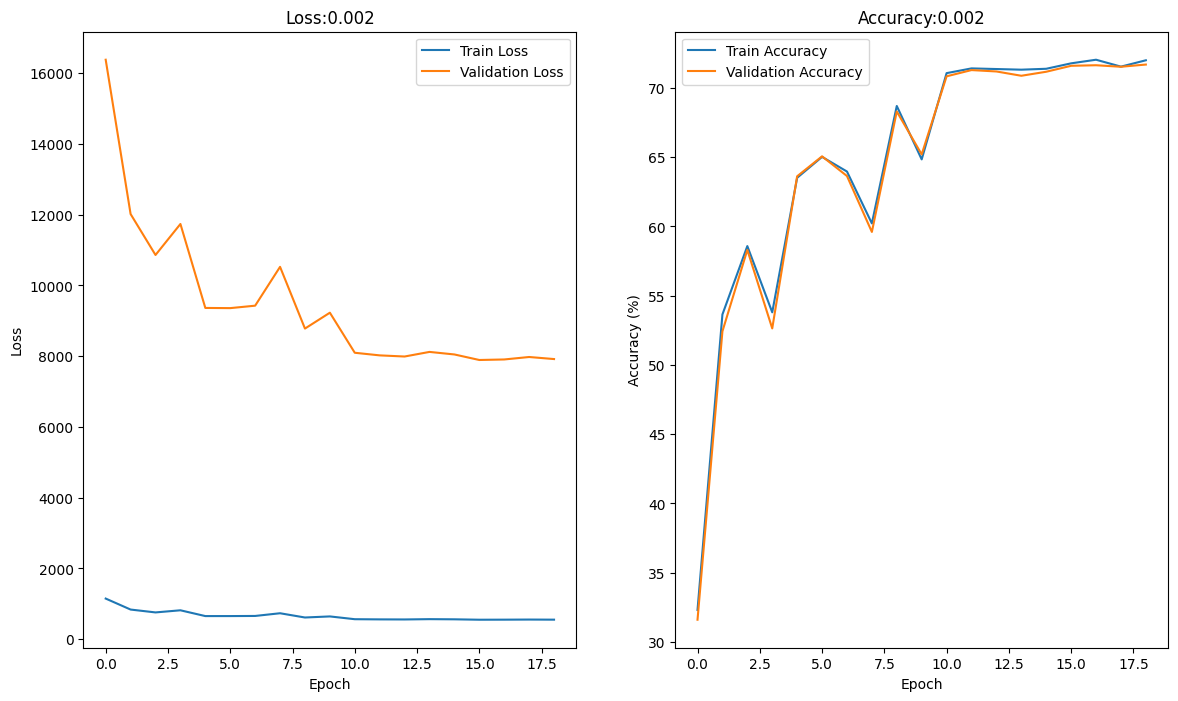

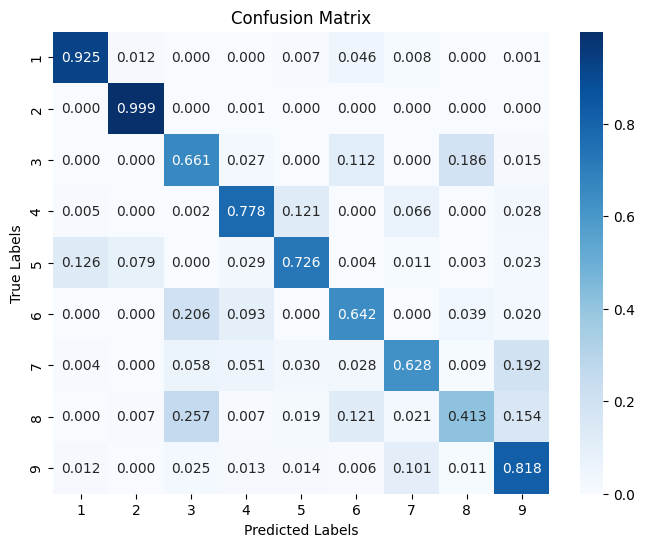

Epoch: 0, Accuracy of the network on the test images: 77.72%
test accuracy:  77.7158774373259
loss:  tensor(6077.1401)
Epoch: 1, train_loss: 1194.956
Epoch: 1, Accuracy of the network on the train images: 41.70%
Epoch: 1, Accuracy of the network on the val images: 40.80%
Epoch: 1, Accuracy of the network on the test images: 48.29%
Epoch: 1, val_loss: 15344.549
Epoch: 1, test_loss: 9770.216
Epoch: 2, train_loss: 872.451
Epoch: 2, Accuracy of the network on the train images: 55.53%
Epoch: 2, Accuracy of the network on the val images: 55.40%
Epoch: 2, Accuracy of the network on the test images: 58.51%
Epoch: 2, val_loss: 11760.968
Epoch: 2, test_loss: 8856.459
Epoch: 3, train_loss: 811.374
Epoch: 3, Accuracy of the network on the train images: 54.50%
Epoch: 3, Accuracy of the network on the val images: 53.97%
Epoch: 3, Accuracy of the network on the test images: 56.80%
Epoch: 3, val_loss: 11853.464
Epoch: 3, test_loss: 8675.671
Epoch: 4, train_loss: 791.071
Epoch: 4, Accuracy of the netwo

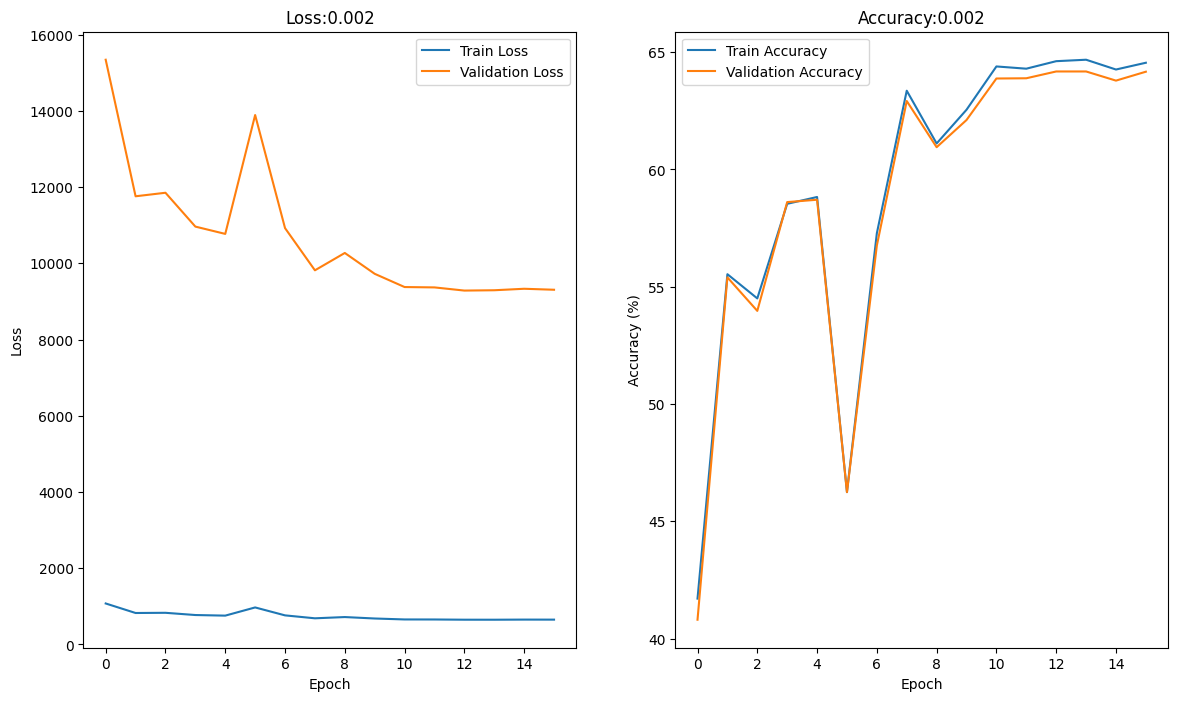

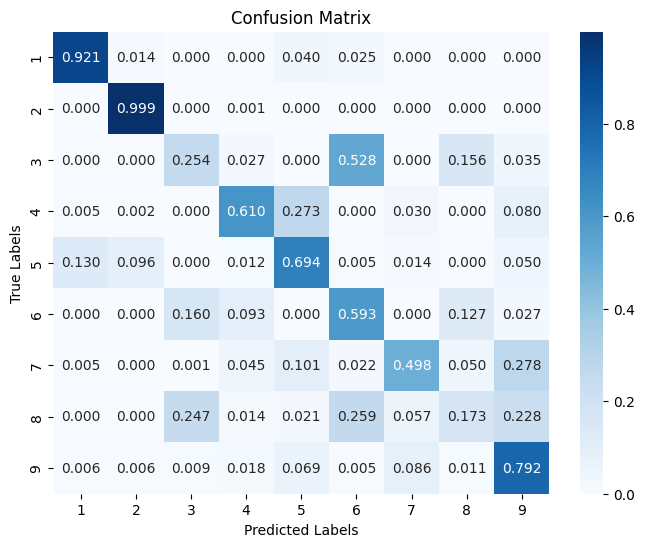

Epoch: 0, Accuracy of the network on the test images: 70.17%
test accuracy:  70.16713091922006
loss:  tensor(7159.6426)
Epoch: 1, train_loss: 1232.934
Epoch: 1, Accuracy of the network on the train images: 36.84%
Epoch: 1, Accuracy of the network on the val images: 36.34%
Epoch: 1, Accuracy of the network on the test images: 40.85%
Epoch: 1, val_loss: 16471.033
Epoch: 1, test_loss: 10925.143
Epoch: 2, train_loss: 1146.061
Epoch: 2, Accuracy of the network on the train images: 39.12%
Epoch: 2, Accuracy of the network on the val images: 38.71%
Epoch: 2, Accuracy of the network on the test images: 47.09%
Epoch: 2, val_loss: 16008.440
Epoch: 2, test_loss: 10991.986
Epoch: 3, train_loss: 934.887
Epoch: 3, Accuracy of the network on the train images: 55.50%
Epoch: 3, Accuracy of the network on the val images: 54.68%
Epoch: 3, Accuracy of the network on the test images: 61.75%
Epoch: 3, val_loss: 12075.929
Epoch: 3, test_loss: 8240.129
Epoch: 4, train_loss: 829.273
Epoch: 4, Accuracy of the n

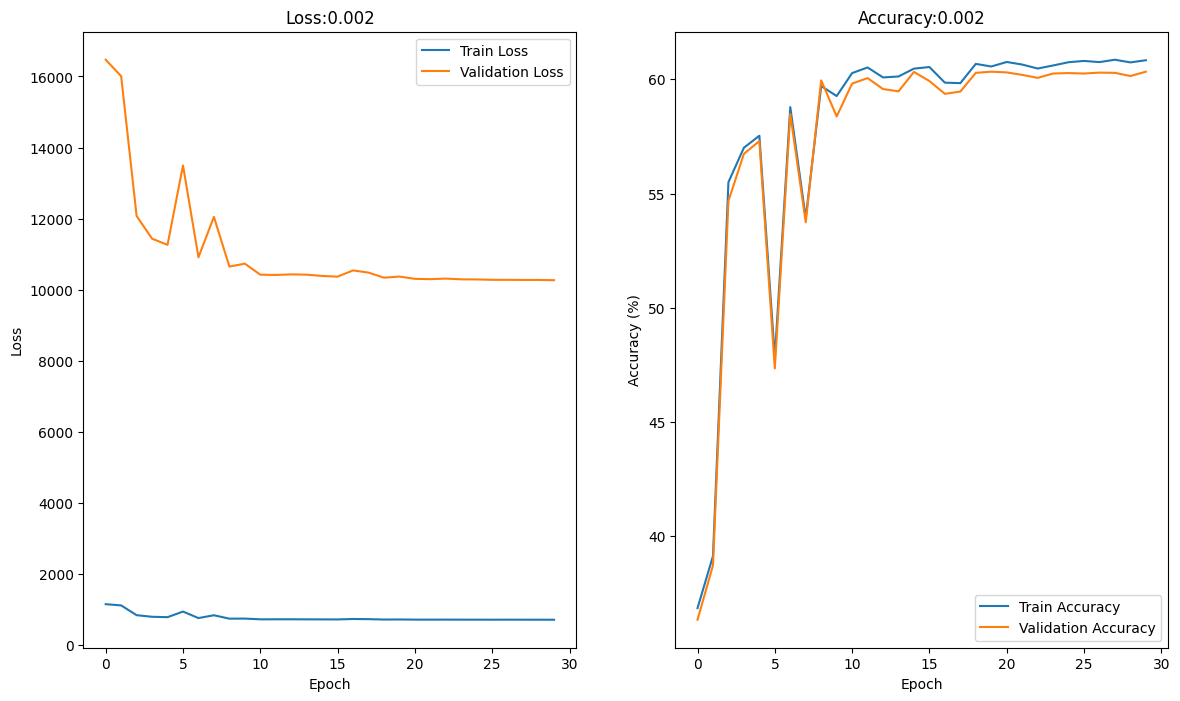

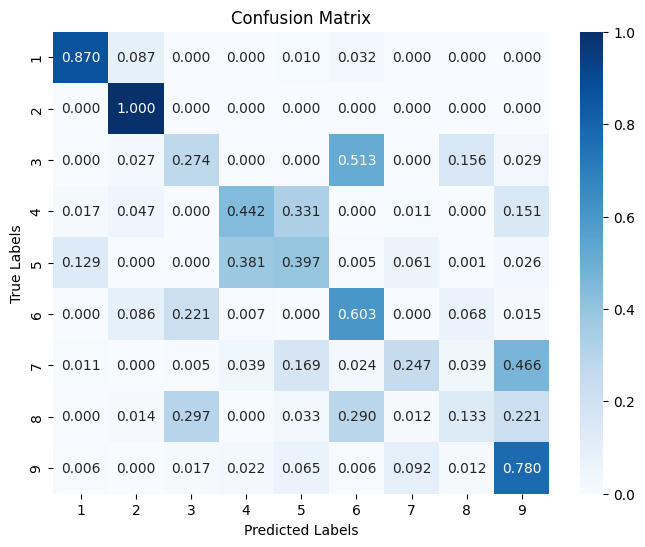

Epoch: 0, Accuracy of the network on the test images: 60.63%
test accuracy:  60.626740947075206
loss:  tensor(8577.7920)
best_accuracy:  77.7158774373259


In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 9)
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.reshape(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        # x = torch.softmax(x, dim=1)
        return x
    
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 9)
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = torch.relu(self.conv3(x))
        x = x.reshape(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 9)
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = x.reshape(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
def train_and_evaluate(model, train_loader, loss_criterion, optimizer, num_epoch, val_loader,scheduler, test_loader):
    # stop condition
    best_validation_loss = float('inf')
    # how many no_improvement the model can tolerate
    patience = 3
    improvement_threshold = 2
    
    train_accuracy_list = []
    val_accuracy_list = []
    train_loss_list = []
    val_loss_list = []
    for epoch_num in range(num_epoch):
        model.train()
        epoch_loss = 0.0
        for i, data in enumerate(train_loader):
            X, y = data
            optimizer.zero_grad()
            outputs = model(X)
            loss = loss_criterion(outputs, y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        scheduler.step()
        print(f'Epoch: {epoch_num + 1}, train_loss: {epoch_loss :.3f}')
        train_accuracy, train_loss = predict(model, train_loader, epoch_num, 'train', loss_criterion)
        val_accuracy, val_loss = predict(model, val_loader, epoch_num, 'val', loss_criterion)
        test_accuracy, test_loss = predict(model, test_loader, epoch_num, 'test', loss_criterion)
        print(f'Epoch: {epoch_num + 1}, val_loss: {val_loss :.3f}')
        print(f'Epoch: {epoch_num + 1}, test_loss: {test_loss :.3f}')
        train_accuracy_list.append(train_accuracy)
        val_accuracy_list.append(val_accuracy)
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        if  best_validation_loss - val_loss > improvement_threshold:
            best_validation_loss = val_loss
            best_epoch = epoch_num
            # Count how many epochs have not improved the model since the best epoch, if it >= patience, the train process will stop early
            early_stopping_counter = 0
            # save the best model
            best_model_state_dict = copy.deepcopy(model.state_dict())
        else:
            early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f'Best epoch: {best_epoch + 1}, finish')
            break
    model.load_state_dict(best_model_state_dict)
        
    return model, train_accuracy_list, val_accuracy_list, train_loss_list, val_loss_list

# model : The model after training, 
# loader: The dataset need to be predicted by the model
# epoch_num: The number of the current epoch. 
# type: used to clarify which dataset is being predicted : (train, test, val)
def predict(model, loader, epoch_num, type, loss_criterion):
    model.eval()
    correct = 0
    total = 0
    epoch_loss = 0
    with torch.no_grad():
        for i, samples in enumerate(loader):
            X, y = samples
            outputs = model(X)
            loss = loss_criterion(outputs, y)
            _, predicted = torch.max(outputs.data, axis = 1)
            total += y.size(0) 
            # train_loader is encoded for training, while others are not encoded. y is different in these three different datasets([1,0] in train_loader or [0] in others)
            correct += (predicted == y).sum().item()
            epoch_loss += loss
    # print(correct)
    print(f'Epoch: {epoch_num + 1}, Accuracy of the network on the {type} images: {100 * correct / total:.2f}%')
    return 100 * correct / total, epoch_loss

def get_confusion_matrix(model, X, y, lr):
    output = model(X)
    _, predict_y = torch.max(output.data, axis = 1)
    true_y = y
    # compute the confution matrix
    conf_matrix = confusion_matrix(true_y, predict_y)
    # compute the number of every classes, for the normalization of confusion matrix
    class_totals = conf_matrix.sum(axis=1, keepdims=True)
    # normalize the confusion matrix
    normalized_confusion_matrix = conf_matrix / class_totals
    
    # create images for confusion_matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_confusion_matrix, annot=True, fmt='.3f', cmap='Blues', xticklabels= np.arange(1,10,1), yticklabels= np.arange(1,10,1))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    if(save_image == True):
        plt.savefig(f"C:/Users/xrw/Desktop/UCL/APPLIED MACHINE LEARNING/AMLS_I_assignment_kit/images/taskb/CNN3confusion{lr}.png")
    plt.show()
    
    

def plot_metrics(train_losses, train_accuracies, test_losses, test_accuracies, lr, epoch_num):
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss:{lr}')
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title(f'Accuracy:{lr}')
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    if(save_image == True):
        plt.savefig(f"C:/Users/xrw/Desktop/UCL/APPLIED MACHINE LEARNING/AMLS_I_assignment_kit/images/taskb/CNN3{lr}.png")
    plt.show()

# l2 regularization
def TaskB(lr, lr_decay, l2_lambda, lr_decay_rate, epoch_num):
    model = CNN2() 
    # Use CrossEntropyLoss to train the model
    loss_criterion = nn.CrossEntropyLoss()

    # optimizer for the CNN
    optimizer = optim.Adam(model.parameters(), lr = lr, weight_decay = l2_lambda)

    # learning rate decay
    lr_decay_rate = 0.1
    scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=lr_decay_rate)

    model, train_accuracy, val_accuracy, train_loss, val_loss = train_and_evaluate(model, train_loader, loss_criterion, optimizer, epoch_num, val_loader, scheduler, test_loader)
    plot_metrics(train_loss, train_accuracy, val_loss, val_accuracy, lr, epoch_num)
    # After the model is trained, get the confusion matrix and recall
    get_confusion_matrix(model, test_tensor_X, test_tensor_y, lr)
    accuracy, test_loss = predict(model, test_loader, -1, 'test', loss_criterion)
    print('test accuracy: ', accuracy)
    print('loss: ', test_loss)
    return model, accuracy

best_accuracy = 0
for i in range(0,3):
    model, accuracy = TaskB(lr = 0.002, lr_decay = False, l2_lambda = 0.02, lr_decay_rate = 0.1, epoch_num = 30)
    if(accuracy > best_accuracy):
        best_accuracy = accuracy
        best_model = model
print('best_accuracy: ', best_accuracy)
torch.save(best_model, 'CNN2_best_model.pth')

## 4. Support Vector Machine (SVM)

In [3]:
print(train_X.shape)
flatten_train_X = train_X.reshape(train_X.shape[0], -1)
flatten_test_X = test_X.reshape(test_X.shape[0], -1)
print(flatten_train_X.shape)

# PCA
def PCAPredict(X, k):
    
    # the bulit-in function for PCA,
    # where n_clusters is the number of clusters.
    pca = PCA(n_components = k)
    
    # fit the algorithm with dataset
    pca.fit(X)

    Variance = pca.explained_variance_ratio_
    Vcomp = pca.components_
    print('variance: ', Variance)
    print('variance: ', Variance.shape)
    print(Vcomp.shape)
    Reduced_train_X = pca.transform(flatten_train_X)
    Reduced_test_X = pca.transform(flatten_test_X)     
    return Reduced_train_X, Reduced_test_X

k = 0.90
Reduced_train_X, Reduced_test_X = PCAPredict(flatten_train_X, k)
print(Reduced_train_X.shape)




(89996, 28, 28, 3)
(89996, 2352)
variance:  [5.46464827e-01 2.29180260e-02 2.08677441e-02 1.85411285e-02
 1.30503068e-02 1.19161190e-02 1.03239044e-02 8.48298719e-03
 8.11528683e-03 6.89442119e-03 6.74943658e-03 6.41676089e-03
 6.04119115e-03 5.58048425e-03 5.30253114e-03 4.60288847e-03
 4.38177816e-03 4.24238305e-03 4.18047706e-03 3.93616397e-03
 3.73659235e-03 3.42306888e-03 3.26649957e-03 3.19693547e-03
 3.16239050e-03 3.02835508e-03 2.88185189e-03 2.79461796e-03
 2.73344718e-03 2.66345376e-03 2.51589387e-03 2.45133416e-03
 2.41428655e-03 2.28322947e-03 2.26725408e-03 2.23554795e-03
 2.20464407e-03 2.14130200e-03 2.13515836e-03 2.03767697e-03
 1.95933410e-03 1.91694214e-03 1.91411795e-03 1.84730789e-03
 1.82315749e-03 1.79998594e-03 1.76979473e-03 1.75900335e-03
 1.68472792e-03 1.67713807e-03 1.62962198e-03 1.59268529e-03
 1.57320821e-03 1.56590215e-03 1.55390977e-03 1.52018034e-03
 1.49271141e-03 1.44128881e-03 1.42641804e-03 1.41569393e-03
 1.40231450e-03 1.38466257e-03 1.37404342

In [15]:

# create SVM model
svm_classifier = SVC(kernel='rbf', C = 0.1)

# Train SVM
svm_classifier.fit(Reduced_train_X, train_y)

# predict according to SVM
y_pred = svm_classifier.predict(Reduced_test_X)

# Compute accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(test_y, y_pred)


# save the model
joblib.dump(svm_classifier, 'svm_model.pkl')

Accuracy: 64.94%


['svm_model.pkl']

In [15]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score 
print(train_X.shape)
flatten_train_X = train_X.reshape(train_X.shape[0], -1)
flatten_test_X = test_X.reshape(test_X.shape[0], -1)
print(flatten_train_X.shape)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(Reduced_train_X, train_y)
y_pred = clf.predict(Reduced_test_X)


accuracy = accuracy_score(test_y, y_pred)
joblib.dump(clf, 'clf.pkl')
print("Accuracy:", accuracy)

(89996, 28, 28, 3)
(89996, 2352)
Accuracy: 0.7211699164345404


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


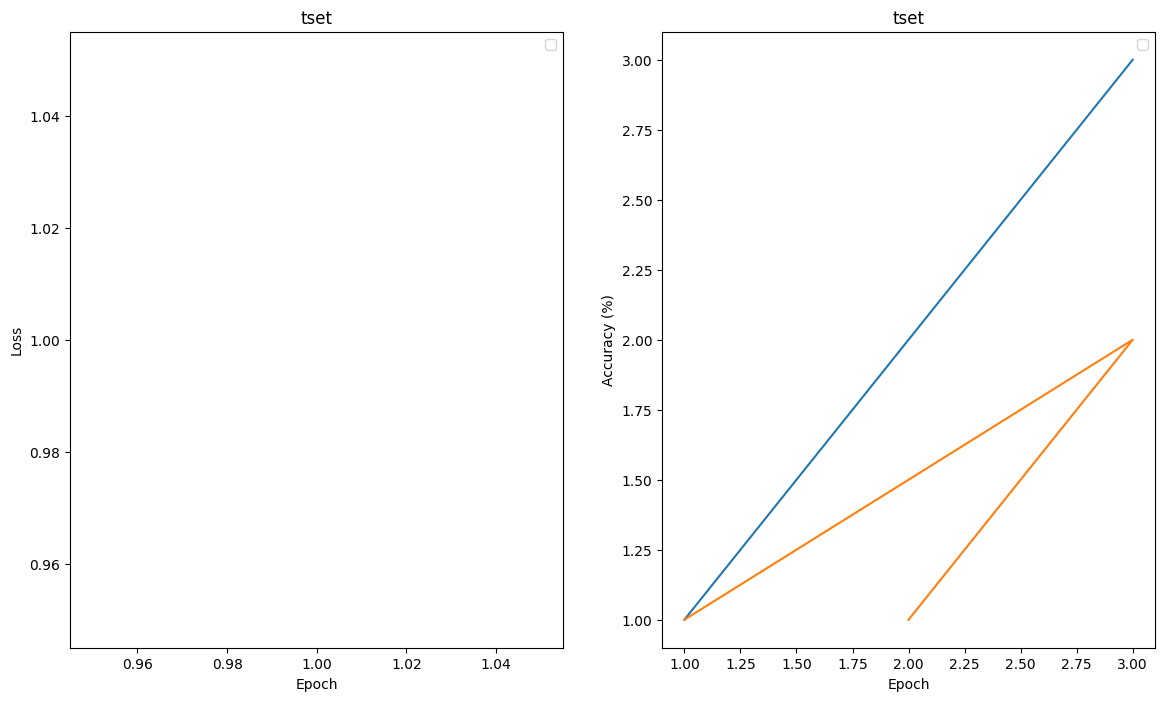

In [23]:
def plot_metrics():
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    plt.title('tset')
    plt.plot([1,1],[1,1])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('tset')
    plt.plot([1,2,3],[1,2,3])
    plt.plot([1,3,2],[1,2,1])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()
plot_metrics()